In [1]:
import pandas as pd

df = pd.read_csv('IRIS.csv')
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Data Shape
print("Data Shape:", df.shape)

# Data Types
print("\nData Types:\n", df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Class Distribution
print("\nClass Distribution:\n", df['species'].value_counts())

# Correlation Analysis (excluding categorical column)
print("\nCorrelation Matrix:\n", df.drop(columns=['species']).corr())


Data Shape: (150, 5)

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Descriptive Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Class Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754 

In [5]:
# Correlation Analysis (only for numerical features)
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
print("\nCorrelation Matrix (numerical features only):\n", df[numerical_features].corr())



Correlation Matrix (numerical features only):
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated()
print("\nNumber of duplicate rows:", duplicate_rows.sum())
if duplicate_rows.sum() > 0:
  df = df.drop_duplicates()
  print("Duplicate rows removed.")

# Explore the distribution of the numerical features using box plots and identify potential outliers
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in numerical_features:
  # Calculate the IQR
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  # Define bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Identify outliers
  outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
  print(f"\nPotential outliers for {feature}:\n", outliers)

  # Handling outliers (optional, you can choose a method like removing them or replacing them)
  # If you decide to remove outliers:
  # df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  # print(f"Outliers for {feature} removed.")

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Number of duplicate rows: 3
Duplicate rows removed.

Potential outliers for sepal_length:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Potential outliers for sepal_width:
     sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor

Potential outliers for petal_length:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Potential outliers for petal_width:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [7]:
# Based on the boxplot, we can see that there are some outliers in sepal_width.
# We can remove them or replace them with a more appropriate value.
# Here, we will remove the outliers.
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]
print("Outliers for sepal_width removed.")

Outliers for sepal_width removed.


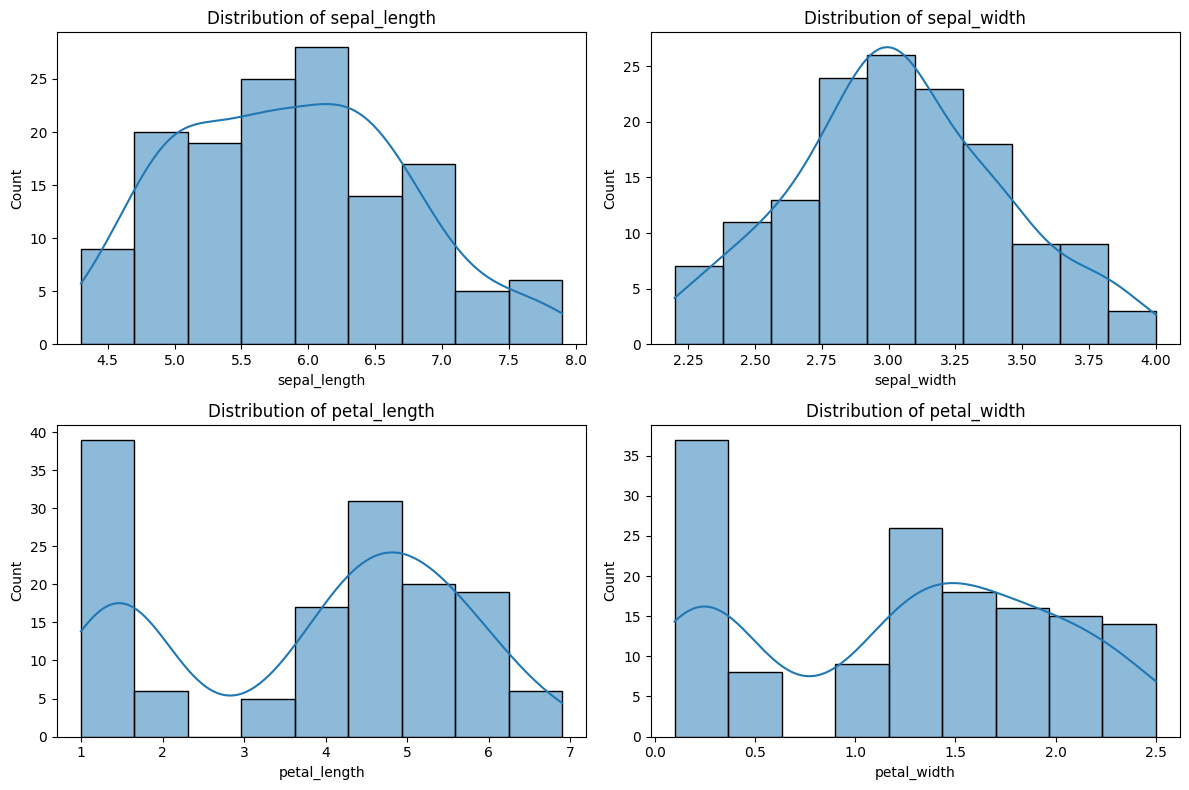

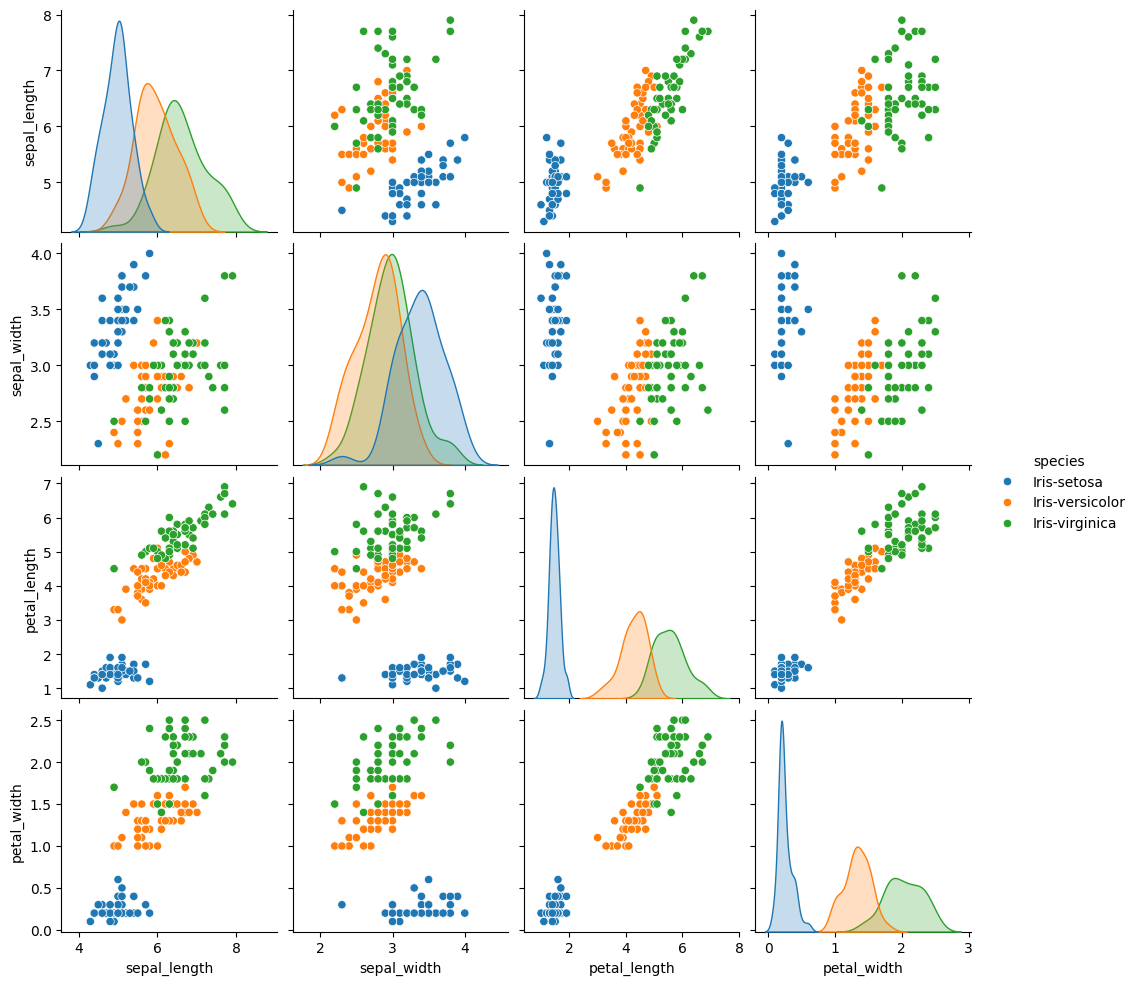

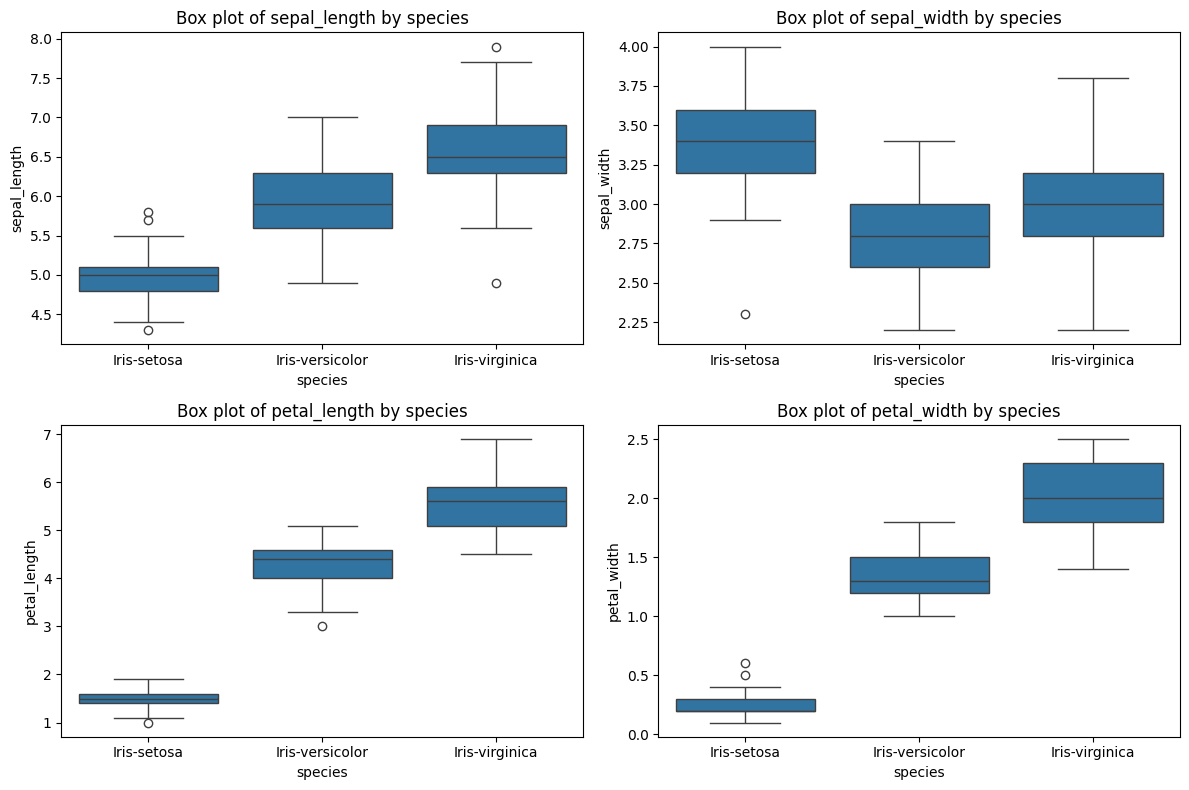

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
  plt.subplot(2, 2, i + 1)
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 2. Scatter plots to visualize relationships between pairs of numerical features, colored by species
sns.pairplot(df, hue='species')
plt.show()

# 3. Box plots for each numerical feature, grouped by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x='species', y=feature, data=df)
  plt.title(f'Box plot of {feature} by species')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable 'species'
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Scale the numerical features
scaler = StandardScaler()
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,-0.926103,1.163072,-1.393237,-1.370894,Iris-setosa,0
1,-1.166453,-0.096923,-1.393237,-1.370894,Iris-setosa,0
2,-1.406803,0.407075,-1.450554,-1.370894,Iris-setosa,0
3,-1.526978,0.155076,-1.335921,-1.370894,Iris-setosa,0
4,-1.046278,1.415071,-1.393237,-1.370894,Iris-setosa,0


In [10]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
model = LogisticRegression()

# Train the model using the fit() method with X_train and y_train
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the species for the test dataset
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.896551724137931
Precision: 0.8984674329501916
Recall: 0.896551724137931
F1-score: 0.8960782766511481

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Create a LogisticRegression model
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

Best parameters: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Best score: 0.9648221343873518


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the species for the test dataset using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1-score: 0.9655172413793104

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 10]]


In [15]:
import pandas as pd

# Get the coefficients of the logistic regression model
coefficients = best_model.coef_
feature_names = X_train.columns.values

# Create a DataFrame to store the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort the coefficients in descending order to identify the most important features
coefficients_df = coefficients_df.sort_values('Coefficient', ascending=False)

print("Feature Importance (based on coefficients):")
display(coefficients_df)

# Analyze model predictions on the test set
y_pred = best_model.predict(X_test)

# Find incorrect predictions
incorrect_predictions_mask = (y_pred != y_test)  # Boolean mask of incorrect predictions
incorrect_predictions_indices = y_test.index[incorrect_predictions_mask]  # Get correct indices

# Retrieve actual and predicted species names
incorrect_actual_species = y_test.loc[incorrect_predictions_indices]  # Get actual labels
incorrect_predicted_species = pd.Series(y_pred[incorrect_predictions_mask], index=incorrect_predictions_indices)

# Print incorrect predictions and their corresponding actual and predicted species
print("\nIncorrect Predictions:")
for index in incorrect_predictions_indices:
    print(f"Index: {index}, Actual Species: {incorrect_actual_species[index]}, Predicted Species: {incorrect_predicted_species[index]}")


Feature Importance (based on coefficients):


,Feature,Coefficient
1,sepal_width,2.064089
0,sepal_length,-2.501035
3,petal_width,-4.793425
2,petal_length,-5.263916



Incorrect Predictions:
Index: 70, Actual Species: 1, Predicted Species: 2


In [16]:
# Get the coefficients of the logistic regression model
coefficients = best_model.coef_
feature_names = X_train.columns.values

# Create a DataFrame to store the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort the coefficients in descending order to identify the most important features
coefficients_df = coefficients_df.sort_values('Coefficient', ascending=False)

print("Feature Importance (based on coefficients):")
display(coefficients_df)

# Analyze model predictions on the test set
y_pred = best_model.predict(X_test)

# Find incorrect predictions
incorrect_predictions_mask = (y_pred != y_test.to_numpy())  # Convert y_test to NumPy for direct comparison
incorrect_predictions_indices = y_test.index[incorrect_predictions_mask]  # Get actual indices

# Retrieve actual and predicted species using .loc[]
incorrect_actual_species = y_test.loc[incorrect_predictions_indices]
incorrect_predicted_species = pd.Series(y_pred[incorrect_predictions_mask], index=incorrect_predictions_indices)

# Print incorrect predictions and their corresponding actual and predicted species
print("\nIncorrect Predictions:")
for index in incorrect_predictions_indices:
    print(f"Index: {index}, Actual Species: {incorrect_actual_species.loc[index]}, Predicted Species: {incorrect_predicted_species.loc[index]}")


Feature Importance (based on coefficients):


,Feature,Coefficient
1,sepal_width,2.064089
0,sepal_length,-2.501035
3,petal_width,-4.793425
2,petal_length,-5.263916



Incorrect Predictions:
Index: 70, Actual Species: 1, Predicted Species: 2


In [17]:
# Get the coefficients of the logistic regression model
coefficients = best_model.coef_
feature_names = X_train.columns.values

# Create a DataFrame to store the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort the coefficients in descending order to identify the most important features
coefficients_df = coefficients_df.sort_values('Coefficient', ascending=False)

print("Feature Importance (based on coefficients):")
display(coefficients_df)

# Analyze model predictions on the test set
y_pred = best_model.predict(X_test)

# Find incorrect predictions
incorrect_predictions_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]
incorrect_actual_species = y_test.iloc[incorrect_predictions_indices]
incorrect_predicted_species = y_pred[incorrect_predictions_indices]

# Print incorrect predictions and their corresponding actual and predicted species
print("\nIncorrect Predictions:")
for i, index in enumerate(incorrect_predictions_indices):
  print(f"Index: {index}, Actual Species: {incorrect_actual_species.iloc[i]}, Predicted Species: {incorrect_predicted_species[i]}")

Feature Importance (based on coefficients):


,Feature,Coefficient
1,sepal_width,2.064089
0,sepal_length,-2.501035
3,petal_width,-4.793425
2,petal_length,-5.263916



Incorrect Predictions:
Index: 15, Actual Species: 1, Predicted Species: 2
